In [32]:
import pandas as pd
import requests
import hvplot.pandas
from config import geoapify_key
import matplotlib.pyplot as plt
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")


In [2]:
geoapify_key

'1fc791602fb04307b651c3517002ffec'

# Single Family Homes

In [3]:
data = pd.read_csv("RawSingleFamily_Neighborhood.csv")
#extract only CO data
co_data = data[data['State'] == "CO"]
co_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
112,275471,112,Southeast Colorado Springs,neighborhood,CO,CO,Colorado Springs,"Colorado Springs, CO",El Paso County,110725.631288,...,353246.013953,355921.927918,356595.275477,355608.073167,353661.872460,351780.279678,349897.025051,347807.422349,345729.584914,343833.043342
121,273540,121,East Colorado Springs,neighborhood,CO,CO,Colorado Springs,"Colorado Springs, CO",El Paso County,152578.563676,...,406938.526026,409023.457025,409060.501212,407739.204381,405632.804675,403776.395427,401849.888875,399950.687498,398333.143770,396716.561489
122,274771,122,Northeast Colorado Springs,neighborhood,CO,CO,Colorado Springs,"Colorado Springs, CO",El Paso County,178931.355163,...,469119.862438,471607.932865,471520.326828,469629.939420,466838.821912,464473.508606,462201.793211,459905.896546,457598.670131,455324.309092
123,273201,123,Central Colorado Springs,neighborhood,CO,CO,Colorado Springs,"Colorado Springs, CO",El Paso County,122613.782219,...,399225.212039,401610.000379,401222.682374,398771.173139,395745.123361,393594.516590,391794.998822,389587.495362,387472.911202,385595.769740
195,268621,198,Briargate,neighborhood,CO,CO,Colorado Springs,"Colorado Springs, CO",El Paso County,221376.998851,...,580258.922678,583199.478548,583062.542914,580394.236304,576322.043089,572696.399635,569441.585752,565857.567255,562587.489715,559927.011649


In [4]:
#create new df grouped by city with mean()
city_group_df = co_data.groupby("City").mean().reset_index()

city_group_df

,City,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
0,Arvada,637377.796610,15025.491525,272638.573867,274080.784912,275152.927620,277489.620542,279879.295273,282845.244412,285765.652665,...,6.853449e+05,6.879758e+05,6.864236e+05,6.821724e+05,6.769887e+05,6.732607e+05,6.702961e+05,6.672062e+05,6.649418e+05,6.632258e+05
1,Aurora,431984.244186,10041.848837,215275.073606,216689.531195,217883.754696,220551.109524,223077.380318,225582.775463,228131.238229,...,5.448983e+05,5.486374e+05,5.493177e+05,5.474321e+05,5.440337e+05,5.408910e+05,5.379538e+05,5.349640e+05,5.325459e+05,5.307702e+05
2,Boulder,413058.218182,16978.745455,420218.764560,421850.694810,424003.617195,428625.211510,434006.605878,440583.595091,448932.581742,...,1.462473e+06,1.476564e+06,1.478751e+06,1.469765e+06,1.456098e+06,1.446531e+06,1.439635e+06,1.431955e+06,1.423847e+06,1.418470e+06
3,Breckenridge,119247.000000,25717.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.567678e+06,1.588060e+06,1.588679e+06,1.570633e+06,1.543507e+06,1.518979e+06,1.491813e+06,1.461490e+06,1.423739e+06,1.397774e+06
4,Broomfield,630394.827586,16243.206897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.964944e+05,8.018412e+05,8.020858e+05,7.988564e+05,7.932189e+05,7.885374e+05,7.846712e+05,7.811790e+05,7.776573e+05,7.744772e+05
5,Castle Rock,761538.000000,5049.000000,247329.461184,248176.692218,249262.587372,251706.250743,254691.596276,257362.329340,259775.332059,...,6.941380e+05,6.980874e+05,6.972796e+05,6.938784e+05,6.895786e+05,6.856671e+05,6.817804e+05,6.772108e+05,6.731206e+05,6.701369e+05
6,Colorado Springs,262342.866667,1880.133333,173929.361679,174176.618830,174364.071071,174842.649330,175385.742133,176086.450727,177099.725502,...,5.259597e+05,5.291756e+05,5.289461e+05,5.260595e+05,5.216983e+05,5.181561e+05,5.151160e+05,5.121343e+05,5.093323e+05,5.069169e+05
7,Denver,269656.276316,3589.618421,222861.652484,224275.272588,225775.065460,229338.011253,233052.097629,236993.172645,240563.782320,...,7.504587e+05,7.564061e+05,7.561275e+05,7.505554e+05,7.426567e+05,7.367188e+05,7.330671e+05,7.296482e+05,7.266448e+05,7.244417e+05
8,Englewood,715456.230769,11387.230769,199467.718786,200794.721935,201946.136526,204632.686795,207540.405446,210505.185341,213513.247178,...,5.478189e+05,5.512034e+05,5.511186e+05,5.479593e+05,5.438170e+05,5.411188e+05,5.390920e+05,5.366112e+05,5.351270e+05,5.340493e+05
9,Fort Collins,658885.828767,16808.246575,238492.138228,238216.480580,238955.165993,240312.730774,242602.042860,244858.222996,247162.346280,...,6.305378e+05,6.344494e+05,6.344738e+05,6.312932e+05,6.274793e+05,6.251225e+05,6.239972e+05,6.225601e+05,6.207051e+05,6.198027e+05


In [5]:
#reduce to only most recent data
singfam_home_price_city = city_group_df.loc[:,['City','2023-02-28']]

#supress scientific notation by rounding
singfam_home_price_city = singfam_home_price_city.round(2)

singfam_home_price_city = singfam_home_price_city.rename(columns = {'2023-02-28':'Typical Home Price (Single Family)'})
singfam_home_price_city

,City,Typical Home Price (Single Family)
0,Arvada,663225.80
1,Aurora,530770.16
2,Boulder,1418469.92
3,Breckenridge,1397773.68
4,Broomfield,774477.19
5,Castle Rock,670136.92
6,Colorado Springs,506916.92
7,Denver,724441.68
8,Englewood,534049.28
9,Fort Collins,619802.66


# Top Tier Homes - By City

### 65th to 95th Percentile

In [6]:
top_tier_data = pd.read_csv("RawTopTierHomes_TimeSeries_City.csv")
co_top_tier_data = top_tier_data[top_tier_data['State'] == 'CO']
co_top_tier_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
23,11093,23,Denver,city,CO,CO,"Denver-Aurora-Lakewood, CO",Denver County,326979.950764,328805.411990,...,942082.164242,949646.149654,947831.933372,937902.898759,924342.955894,914007.662513,907491.517679,901787.132280,896320.040680,889998.443785
41,4172,41,Colorado Springs,city,CO,CO,"Colorado Springs, CO",El Paso County,265637.747108,265983.726276,...,641378.859802,645511.536762,645092.597918,641455.885704,635967.227536,631711.488346,627915.155849,624114.438735,620594.293713,617340.046049
52,16846,52,Aurora,city,CO,CO,"Denver-Aurora-Lakewood, CO",Arapahoe County,285492.957737,287298.074916,...,648935.115881,652842.650925,652493.160057,648421.855444,642484.770682,637178.879709,632583.799977,628188.430099,624015.413908,620786.291844
149,4764,149,Fort Collins,city,CO,CO,"Fort Collins, CO",Larimer County,286064.101742,285605.423940,...,760889.575727,766131.382360,764996.759276,758820.457210,751475.537166,746727.951147,744343.606211,742111.131763,739520.631470,737892.085590
213,5519,214,Lakewood,city,CO,CO,"Denver-Aurora-Lakewood, CO",Jefferson County,300401.602977,302240.829184,...,774677.688102,778515.045260,775425.344187,768103.421216,758931.028524,752455.453400,747630.611437,743910.433151,740756.657742,737691.879414


In [7]:
#function for pulling desired data from one df and storing in another
def pulldata(df1,df2,colname):
    for index,row in df1.iterrows():
        for index2, row2 in df2.iterrows():
            if row2['RegionName'] == row['City']:
                df1.loc[index,colname] = row2['2023-02-28']
    return df1

In [8]:
#call function
pulldata(singfam_home_price_city,co_top_tier_data,'Typical Home Price (Top Teir)')

#supress scientific notation and create copy
SingFam_TopTier_combined_df = singfam_home_price_city.round(2).copy()
SingFam_TopTier_combined_df.head()

,City,Typical Home Price (Single Family),Typical Home Price (Top Teir)
0,Arvada,663225.80,794293.06
1,Aurora,530770.16,620786.29
2,Boulder,1418469.92,1641210.97
3,Breckenridge,1397773.68,2142628.16
4,Broomfield,774477.19,899867.60


# Bottom Tier Homes - By City

### 5th to 35th Percentile

In [9]:
bottom_tier_data = pd.read_csv("RawBottomTierHomes_TimeSeries_City.csv")

In [10]:
co_bottom_tier_data = bottom_tier_data[bottom_tier_data['State'] == 'CO']
co_bottom_tier_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
23,11093,23,Denver,city,CO,CO,"Denver-Aurora-Lakewood, CO",Denver County,84724.067726,85248.100636,...,393601.604805,397420.554385,398746.646769,397630.428547,395562.230010,393842.559007,392726.937305,391079.216640,390542.067783,390848.486767
41,4172,41,Colorado Springs,city,CO,CO,"Colorado Springs, CO",El Paso County,102719.000567,102871.424171,...,356482.939478,358825.067735,359345.854424,358255.310597,356384.209459,354693.337433,353094.408159,351221.341520,349449.047626,348048.613685
52,16846,52,Aurora,city,CO,CO,"Denver-Aurora-Lakewood, CO",Arapahoe County,100875.814337,101540.815499,...,365438.322270,368844.479603,370385.266282,369817.683477,367919.436946,365804.893727,363902.696561,362015.082418,361190.192055,360939.944917
149,4764,149,Fort Collins,city,CO,CO,"Fort Collins, CO",Larimer County,124124.500566,124013.978142,...,418779.992149,421370.047278,421882.092354,420010.675777,417749.862300,416429.994741,416257.026337,415798.204942,415414.570185,415641.790125
213,5519,214,Lakewood,city,CO,CO,"Denver-Aurora-Lakewood, CO",Jefferson County,122184.456492,122944.942841,...,411678.048914,414602.932491,415235.446183,413755.857497,411328.136763,409237.274095,407525.162746,405712.248566,404784.848648,404437.634999


In [11]:
pulldata(SingFam_TopTier_combined_df,co_bottom_tier_data, 'Typical Home Price (Bottom Tier)')

combined_df = SingFam_TopTier_combined_df.round(2).copy()
combined_df.head()

,City,Typical Home Price (Single Family),Typical Home Price (Top Teir),Typical Home Price (Bottom Tier)
0,Arvada,663225.80,794293.06,486501.75
1,Aurora,530770.16,620786.29,360939.94
2,Boulder,1418469.92,1641210.97,546725.46
3,Breckenridge,1397773.68,2142628.16,674120.89
4,Broomfield,774477.19,899867.60,494302.13


# Fetching Geocoords from geoapify

In [12]:
# city_list = combined_df['City'].tolist()

base_url = "https://api.geoapify.com/v1/geocode/search?"

In [13]:
for index,row in combined_df.iterrows():
    
    city = combined_df.loc[index,"City"]
    city_url = f"{base_url}city={city}&state=CO&apiKey={geoapify_key}"
    
    city_data = requests.get(city_url).json()
    try:
        lat = city_data['features'][0]['properties']['lat']
        lon = city_data['features'][0]['properties']['lon']
        combined_df.loc[index,"Latitude"] = lat
        combined_df.loc[index,"Longitude"] = lon
        print(f"Coords for {city} stored in df")
    except:
        print(f'Error Occured with {city}')
        continue

Coords for Arvada stored in df
Coords for Aurora stored in df
Coords for Boulder stored in df
Coords for Breckenridge stored in df
Coords for Broomfield stored in df
Coords for Castle Rock stored in df
Coords for Colorado Springs stored in df
Coords for Denver stored in df
Coords for Englewood stored in df
Coords for Fort Collins stored in df
Coords for Frisco stored in df
Coords for Golden stored in df
Coords for Lakewood stored in df
Coords for Littleton stored in df
Coords for Longmont stored in df
Coords for Mesa stored in df
Coords for Parker stored in df
Coords for Pueblo stored in df
Coords for Thornton stored in df


In [14]:
combined_df.to_csv("CO_SingFam_TopTier_BotTier_Combined.csv")
combined_df

,City,Typical Home Price (Single Family),Typical Home Price (Top Teir),Typical Home Price (Bottom Tier),Latitude,Longitude
0,Arvada,663225.80,794293.06,486501.75,39.800550,-105.081157
1,Aurora,530770.16,620786.29,360939.94,39.740511,-104.830995
2,Boulder,1418469.92,1641210.97,546725.46,40.014986,-105.270545
3,Breckenridge,1397773.68,2142628.16,674120.89,39.482912,-106.046549
4,Broomfield,774477.19,899867.60,494302.13,39.940399,-105.052080
5,Castle Rock,670136.92,933674.81,534250.77,39.372255,-104.858683
6,Colorado Springs,506916.92,617340.05,348048.61,38.833958,-104.825348
7,Denver,724441.68,889998.44,390848.49,39.739236,-104.984862
8,Englewood,534049.28,633196.47,421651.16,39.648206,-104.987964
9,Fort Collins,619802.66,737892.09,415641.79,40.550853,-105.066808


In [15]:
map_plot_1 = combined_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    color = "City",
    size = "Average Home Price (Single Family)",
    scale = .015,
    frame_width = 500, frame_height = 500)

map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (City)

# Hospitals

does the number of hosipitals in a city impact home pricing 

In [16]:
base_url = "https://api.geoapify.com/v2/places"
categories= "healthcare"
radius= 5000
params= {
'categories': categories,
'apiKey': geoapify_key}

hospital=[]
for index, row in combined_df.iterrows():
    lat= row['Latitude']
    lon= row['Longitude']
    params['bias']= f'proximity:{lon},{lat}'
    params['filter']= f'circle:{lon},{lat},{radius}'
    
    data= requests.get(base_url, params).json()
    
    hospital.append({"City":row["City"], "Number of Hospitals": len(data["features"])})
    print(f"{row['City']}:{len(data['features'])}")

Arvada:20
Aurora:20
Boulder:20
Breckenridge:0
Broomfield:20
Castle Rock:8
Colorado Springs:20
Denver:20
Englewood:20
Fort Collins:20
Frisco:2
Golden:12
Lakewood:20
Littleton:16
Longmont:20
Mesa:1
Parker:20
Pueblo:10
Thornton:20


In [17]:
#create dataframe
hospital_df = pd.DataFrame(hospital)
hospital_df

,City,Number of Hospitals
0,Arvada,20
1,Aurora,20
2,Boulder,20
3,Breckenridge,0
4,Broomfield,20
5,Castle Rock,8
6,Colorado Springs,20
7,Denver,20
8,Englewood,20
9,Fort Collins,20


In [24]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept 
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('number of hospitals')
    plt.ylabel(y_label)
    plt.show() 
    print(r_value)

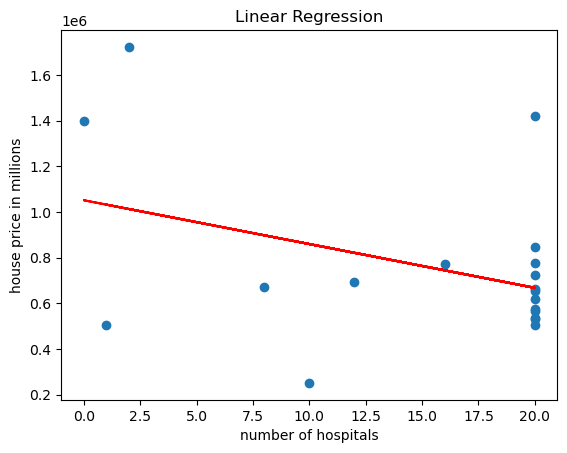

-0.38680486414759463


In [33]:
## 6.4.5  Linear Regression on  Wind Speed for Southern Hemisphere
x_values = hospital_df["Number of Hospitals"]
y_values = combined_df["Typical Home Price (Single Family)"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression",
                       "house price in millions",(-50,20))

<Figure size 2500x400 with 0 Axes>

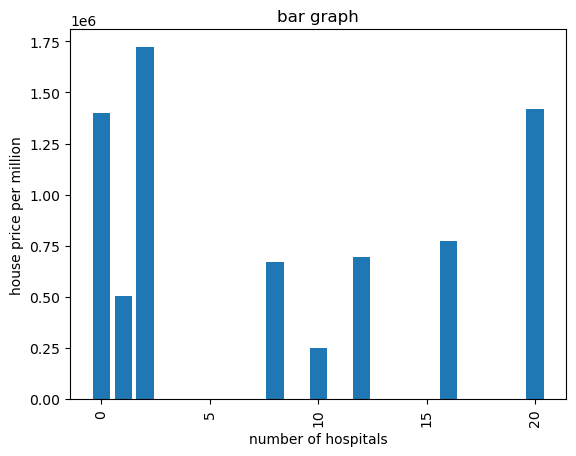

<Figure size 2500x400 with 0 Axes>

In [31]:
#Plotting bar graph
plt.bar(hospital_df["Number of Hospitals"],combined_df["Typical Home Price (Single Family)"])
plt.xticks(rotation="vertical")
plt.title("bar graph")
plt.xlabel("number of hospitals")
plt.ylabel("house price per million")
plt.figure(figsize=(25,4))